## Generate Random Latitudes and Longitudes

In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#unpack latitudes and longitudes to a list so you only have to generate it 1x.
coordinates = list(lat_lngs)


## Generate Random World Cities

In [4]:
#Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count.
len(cities)


621

## Make an API Call

In [5]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [6]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


## Get City Weather Data

In [7]:
#Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
#Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
 
    # Run API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | merauke
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | malakal
Processing Record 4 of Set 1 | beisfjord
Processing Record 5 of Set 1 | provideniya
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | isetskoye
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | haikou
Processing Record 12 of Set 1 | kerman
Processing Record 13 of Set 1 | cairns
Processing Record 14 of Set 1 | imbituba
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | lubao
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | isangel
Processing Record 21 of Set 1 | charters towers
Processing Record 22 of Set 1 | odessa
Processing Record 23 of Set 1 | samusu
City not found. 

City not found. Skipping...
Processing Record 36 of Set 4 | hohoe
Processing Record 37 of Set 4 | port hedland
Processing Record 38 of Set 4 | jacobina
Processing Record 39 of Set 4 | aberdeen
Processing Record 40 of Set 4 | kuyanovo
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | jaguarari
Processing Record 43 of Set 4 | taburi
City not found. Skipping...
Processing Record 44 of Set 4 | tasiilaq
Processing Record 45 of Set 4 | the pas
Processing Record 46 of Set 4 | tarakan
Processing Record 47 of Set 4 | mayor pablo lagerenza
Processing Record 48 of Set 4 | xadani
City not found. Skipping...
Processing Record 49 of Set 4 | yellowknife
Processing Record 50 of Set 4 | quatre cocos
Processing Record 1 of Set 5 | cam ranh
Processing Record 2 of Set 5 | grants
Processing Record 3 of Set 5 | katherine
Processing Record 4 of Set 5 | sitka
Processing Record 5 of Set 5 | severo-yeniseyskiy
Processing Record 6 of Set 5 | chagda
City not found. Skipping...
Processing 

Processing Record 20 of Set 8 | piranshahr
Processing Record 21 of Set 8 | shelburne
Processing Record 22 of Set 8 | rorvik
Processing Record 23 of Set 8 | saldanha
Processing Record 24 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 25 of Set 8 | kaitangata
Processing Record 26 of Set 8 | inhambane
Processing Record 27 of Set 8 | takoradi
Processing Record 28 of Set 8 | xai-xai
Processing Record 29 of Set 8 | ponta do sol
Processing Record 30 of Set 8 | souillac
Processing Record 31 of Set 8 | hofn
Processing Record 32 of Set 8 | riyadh
Processing Record 33 of Set 8 | ibra
Processing Record 34 of Set 8 | yumen
Processing Record 35 of Set 8 | villa bruzual
Processing Record 36 of Set 8 | itoigawa
Processing Record 37 of Set 8 | nabire
Processing Record 38 of Set 8 | klaksvik
Processing Record 39 of Set 8 | bonthe
Processing Record 40 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 41 of Set 8 | bajil
Processing Record 42 of Set 8 | tsentralnyy
Cit

Processing Record 7 of Set 12 | cedral
Processing Record 8 of Set 12 | khonuu
City not found. Skipping...
Processing Record 9 of Set 12 | mount isa
Processing Record 10 of Set 12 | marinette
Processing Record 11 of Set 12 | sulangan
Processing Record 12 of Set 12 | general roca
Processing Record 13 of Set 12 | morro bay
Processing Record 14 of Set 12 | ekhinos
Processing Record 15 of Set 12 | constitucion
Processing Record 16 of Set 12 | sirsi
Processing Record 17 of Set 12 | portland
Processing Record 18 of Set 12 | axim
Processing Record 19 of Set 12 | miri
Processing Record 20 of Set 12 | kilindoni
Processing Record 21 of Set 12 | havre-saint-pierre
Processing Record 22 of Set 12 | sinnamary
Processing Record 23 of Set 12 | lakselv
Processing Record 24 of Set 12 | genhe
Processing Record 25 of Set 12 | camopi
Processing Record 26 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 27 of Set 12 | yenagoa
Processing Record 28 of Set 12 | lagoa
Processing Record 29 o

In [9]:
print(len(city_data))

561


## Create DataFrame of City Weather Data

In [10]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Merauke,-8.4667,140.3333,81.28,79,100,4.27,ID,2022-01-30 05:33:28
1,Kodiak,57.7900,-152.4072,29.71,64,0,12.66,US,2022-01-30 05:33:28
2,Malakal,9.5334,31.6605,73.11,16,10,11.77,SS,2022-01-30 05:33:28
3,Beisfjord,68.3751,17.5988,17.65,79,100,5.12,NO,2022-01-30 05:33:29
4,Provideniya,64.3833,-173.3000,3.36,82,15,4.68,RU,2022-01-30 05:33:30
5,Punta Arenas,-53.1500,-70.9167,42.91,81,0,14.97,CL,2022-01-30 05:30:40
6,Isetskoye,56.4858,65.3226,10.56,88,100,2.55,RU,2022-01-30 05:33:30
7,Busselton,-33.6500,115.3333,86.04,39,3,16.84,AU,2022-01-30 05:33:30
8,Vaini,-21.2000,-175.2000,81.45,77,99,14.07,TO,2022-01-30 05:33:31
9,Talnakh,69.4865,88.3972,-0.80,97,100,8.03,RU,2022-01-30 05:33:31


In [11]:
#assign variable to hold new order of columns
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#apply new order to df
city_data_df = city_data_df[new_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Merauke,ID,2022-01-30 05:33:28,-8.4667,140.3333,81.28,79,100,4.27
1,Kodiak,US,2022-01-30 05:33:28,57.7900,-152.4072,29.71,64,0,12.66
2,Malakal,SS,2022-01-30 05:33:28,9.5334,31.6605,73.11,16,10,11.77
3,Beisfjord,NO,2022-01-30 05:33:29,68.3751,17.5988,17.65,79,100,5.12
4,Provideniya,RU,2022-01-30 05:33:30,64.3833,-173.3000,3.36,82,15,4.68


In [12]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plots

In [13]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

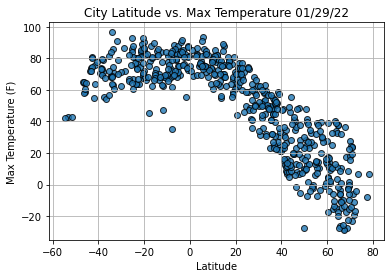

In [14]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

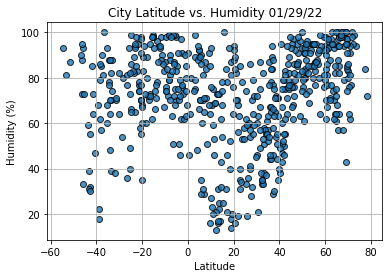

In [15]:
#Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

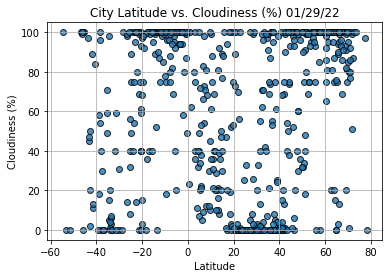

In [16]:
#Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

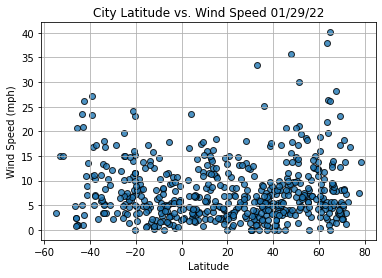

In [17]:
#Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

## Linear Regression Function

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [19]:
#Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

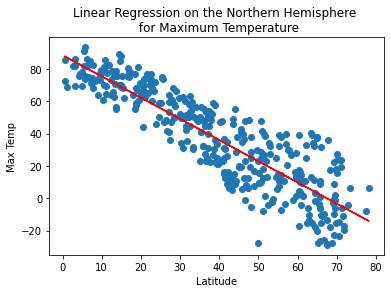

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(5,-40))


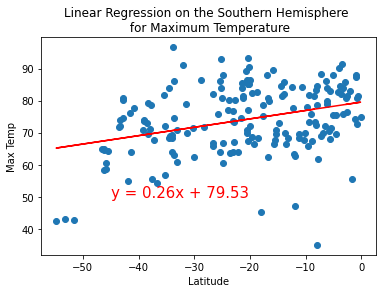

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',
                       (-45,50))


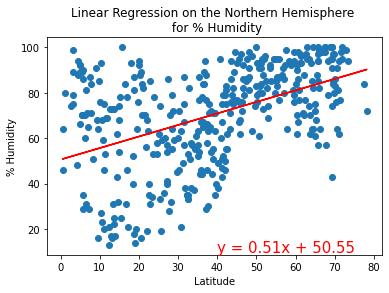

In [22]:
#Linear regression on the Northern Hemisphere humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',
                       (40,10))

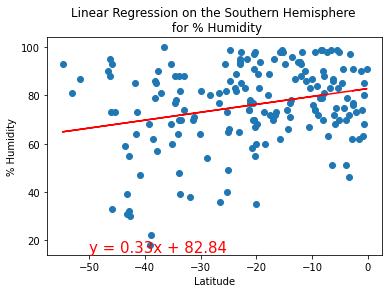

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',
                        (-50,15))

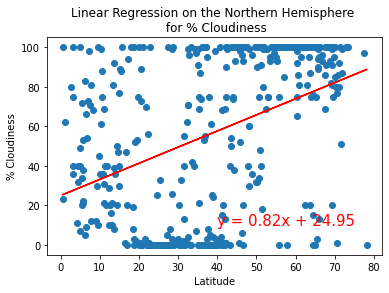

In [24]:
#Linear regression on the Northern Hemisphere cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',
                       (40,10))

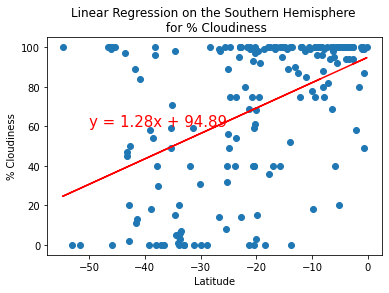

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',
                       (-50,60))

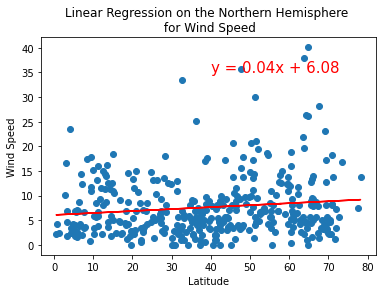

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(40,35))

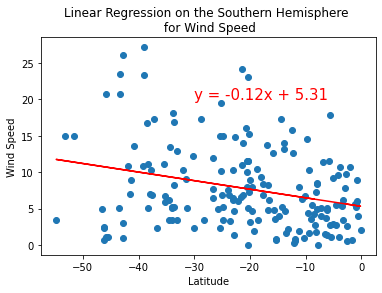

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-30,20))